<a href="https://colab.research.google.com/github/gabrielmprata/MVP_SP02_Linguagem_Natural/blob/main/MVP_SP02_Linguagem_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

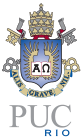 <font size="4"> **MVP de Machine Learning e Deep Learning**

---
>
**Pós-Graduação em Ciência de Dados e Analytics**
>
**Sprint 02**
>
**Aluno**: Gabriel Prata
>
**Data**: 05/06/2023
>
---

#**<font color=#FE8202> 1. Objetivo**

O objetivo desse estudo, é avaliar se a crítica foi positiva ou negativa, utilizando a  classificação de textos voltada à análise de sentimentos.

#**<font color=#FE8202> 2. Carga de Dados**

Com o intuido de ter mais sentenças de sentimentos, vamos importar três datasets, com avaliações de diferentes serviços e unifica-los em apenas um.
>
**Amazon**: Avaliações de produtos
>
**IMDB**: Avaliações de filmes
>
**YELP**: Avaliações de gastronomia


O dataset foi importado UC Irvine Machine Learning Repository
>
Para mais informações sobre o dataset, consulte:
>
https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences

>**<font color=#FE8202> Dicionário de dados**

1.   **Review**    -  Avaliação escrita pelo usuário da plataforma.
2.   **sentiment** - Sentimento da avaliação, onde 0 é Ruim e 1 é Bom

>**<font color=#FE8202> Bibliotecas necessárias**

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np
import string

# Visualização
import matplotlib.pyplot as plt
import seaborn as sb

# Processar os dados de entrada
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from scipy.spatial.distance import cosine
import networkx as nx
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


>**<font color=#FE8202> Importando os arquivos**

In [23]:
# URL de importação
url  = "https://raw.githubusercontent.com/gabrielmprata/MVP_SP02_Linguagem_Natural/main/amazon_cells_labelled.txt"
url2 = "https://raw.githubusercontent.com/gabrielmprata/MVP_SP02_Linguagem_Natural/main/imdb_labelled.txt"
url3 = "https://raw.githubusercontent.com/gabrielmprata/MVP_SP02_Linguagem_Natural/main/yelp_labelled.txt"

amazon_df = pd.read_csv(url, delimiter='\t', header=None, names=['Review', 'sentiment'])

imdb_df = pd.read_csv(url2, delimiter='\t', header=None, names=['Review', 'sentiment'])

yelp_df = pd.read_csv(url3, delimiter='\t', header=None, names=['Review', 'sentiment'])

In [24]:
# Concatenação dos dados
df_sentimentos = pd.concat([amazon_df, imdb_df, yelp_df], ignore_index=True)

In [25]:
df_sentimentos

,Review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


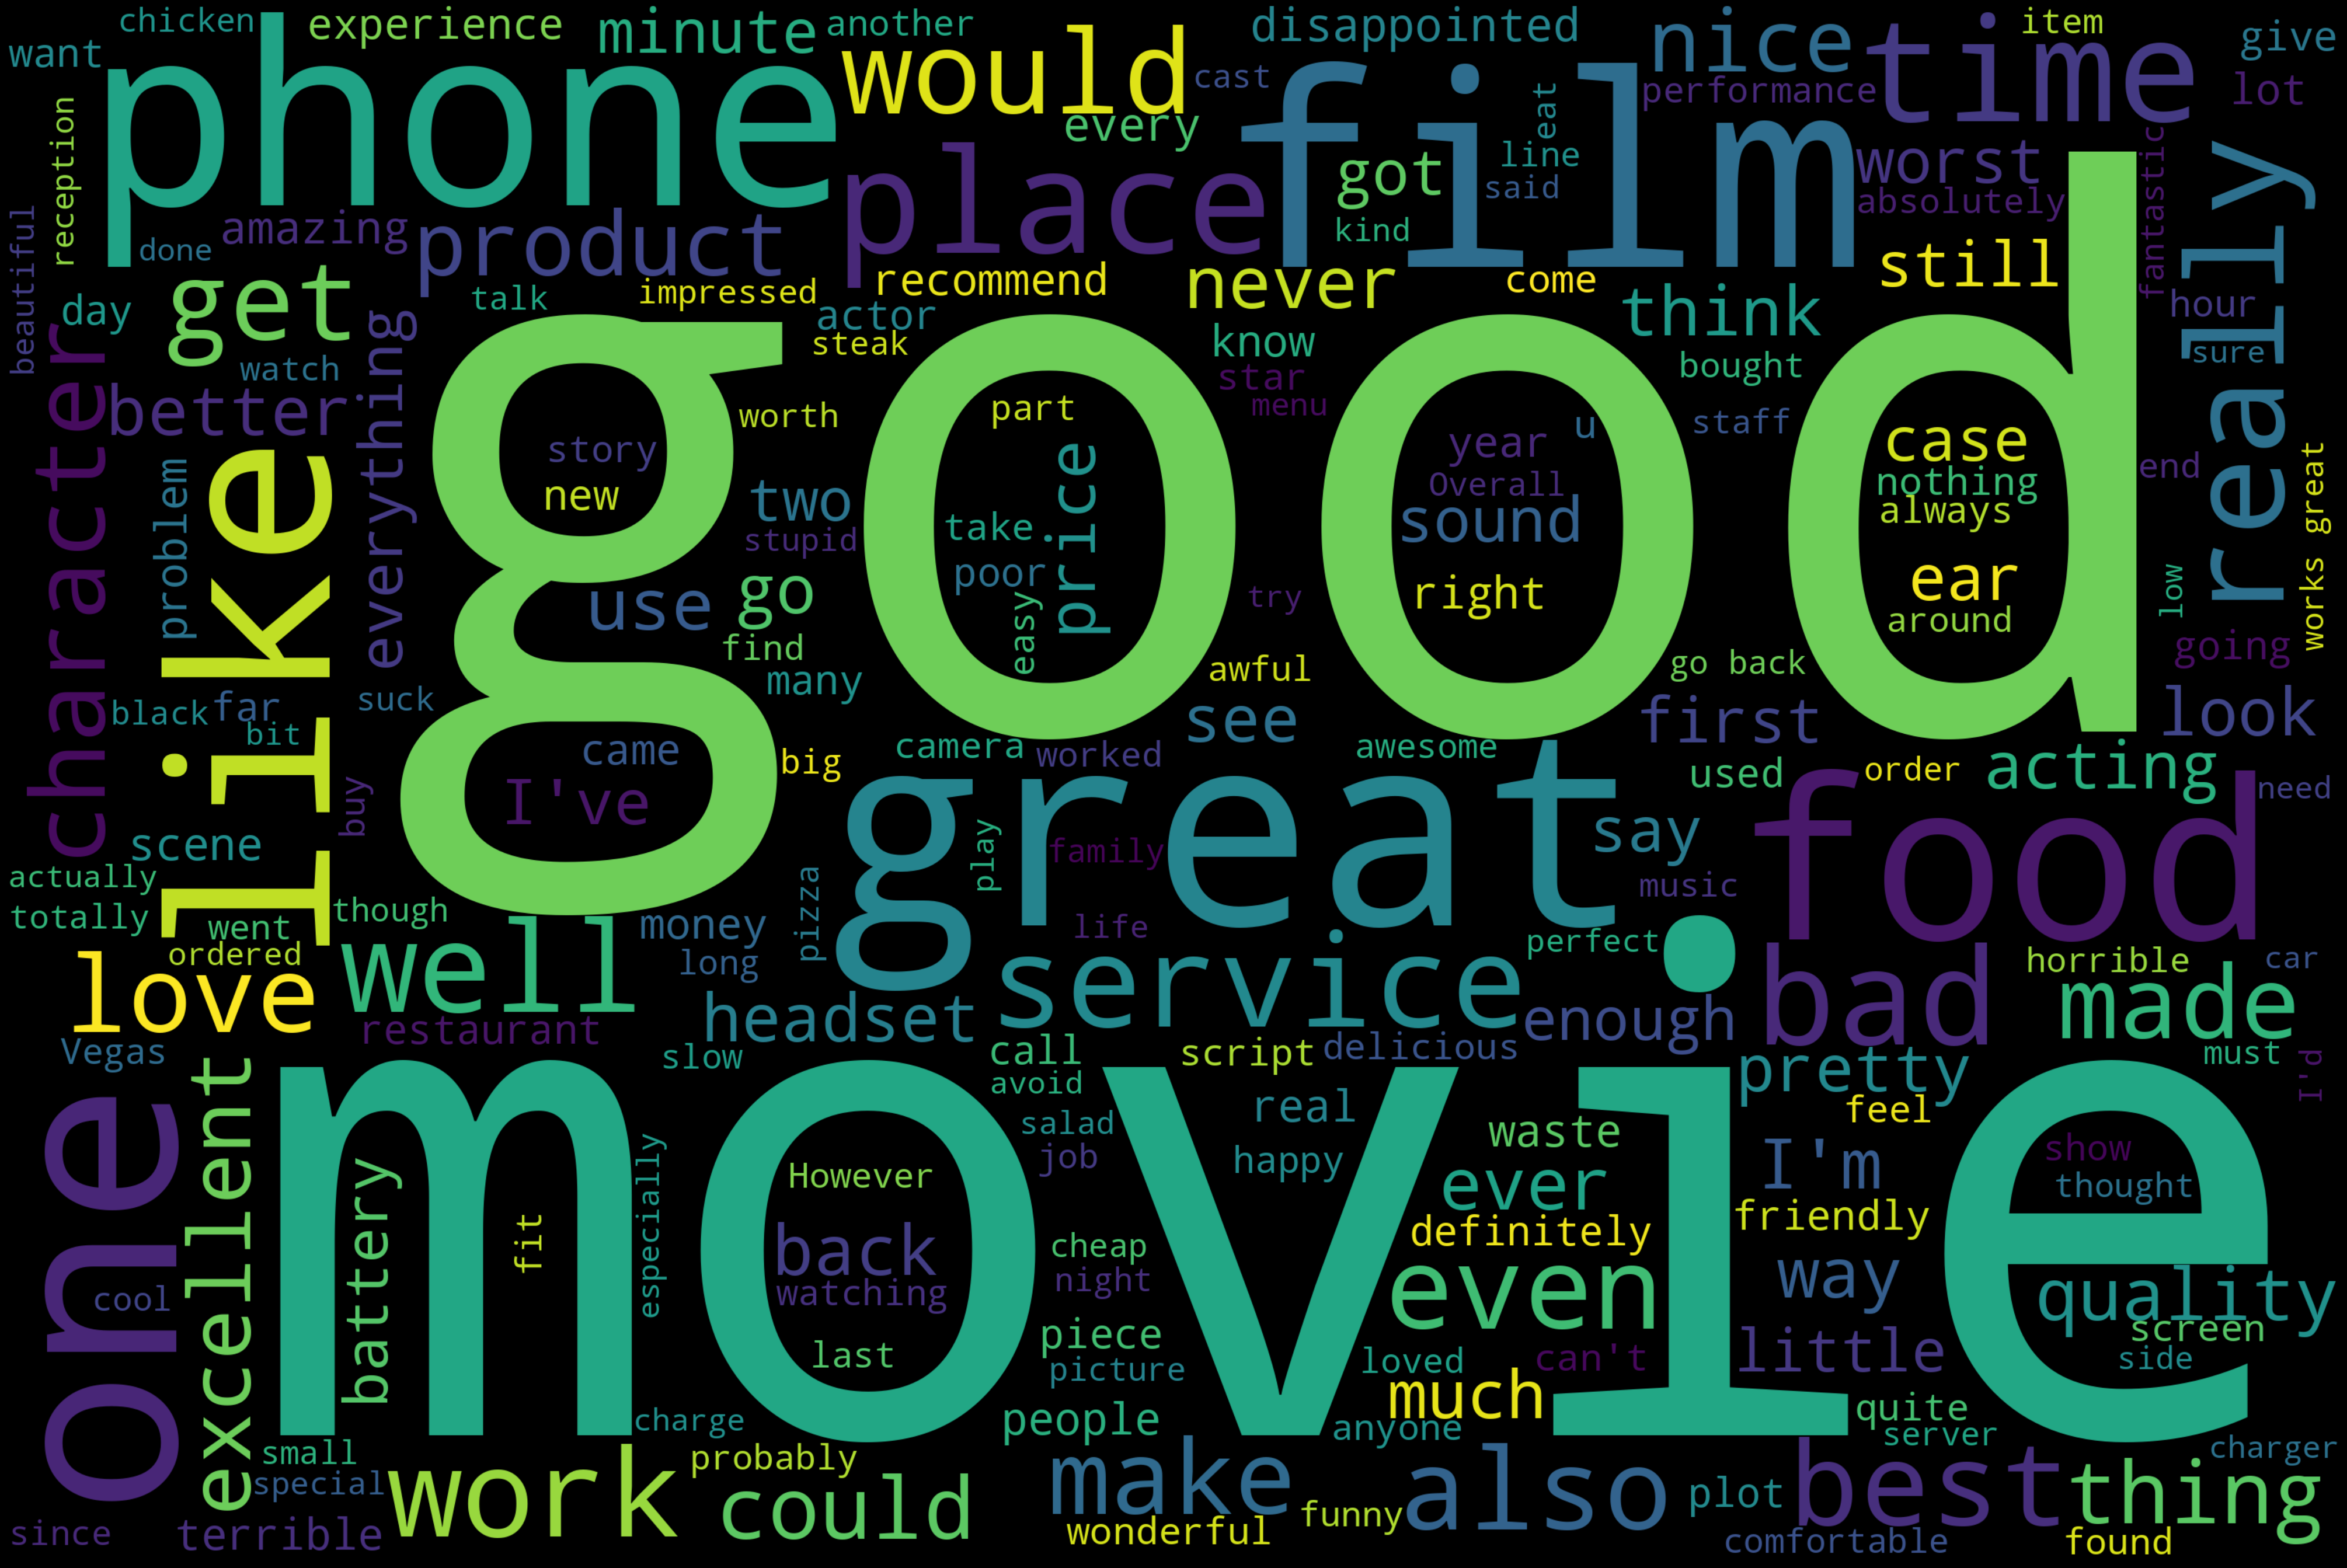

In [ ]:
#Word Cloud
text = ''
for review in df_sentimentos.Review.values:
    text += f" {review}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text